# Linear Regression
    1. For each segment:
        1. For each aclendat month:
            1. Do lin reg on each possible combination of Eva, Precip, Irrig
    1. For 

In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.formula.api as smf
import math
import numpy as np
import matplotlib.pyplot as plt

In [24]:
waterData = pd.read_csv('RRCA_baseflow.csv')
waterData['est_Month'] = np.ceil((((waterData.Date%365.25)/30)+2)%12)

display(waterData.head(5))

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,est_Month
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161,1.0
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161,2.0
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203,3.0
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203,4.0
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689,5.0


In [26]:
def oneLinReg(data = waterData, x = 'Irrigation_pumping',y='Observed',segment = 0):
    intercepts = []
    coefs = []
    
    segList = []
    if segment ==0:
        segList = data.Segment_id.unique()
    else:
        segList = [segment]
        
    for segment in segList:
            lm = LinearRegression()

            subdata = data[data.Segment_id==segment]
            featureCols = [x]
            X = subdata[featureCols]
            y = subdata.Observed

            lm.fit(X,y)
            intercepts.append(lm.intercept_)
            coefs.append(lm.coef_)

    return intercepts,coefs

In [40]:
[testInter ,testCoefs] = oneLinReg()

In [51]:
display(oneLinReg(x='Precipitation',segment=144))

lm = smf.ols(formula='Observed ~ Evapotranspiration + Precipitation', data=waterData).fit()
display(lm.summary)

([6.122184226811472], [array([-0.02407631])])

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x0000021CD4938C70>>

<AxesSubplot:xlabel='est_Month', ylabel='Observed'>

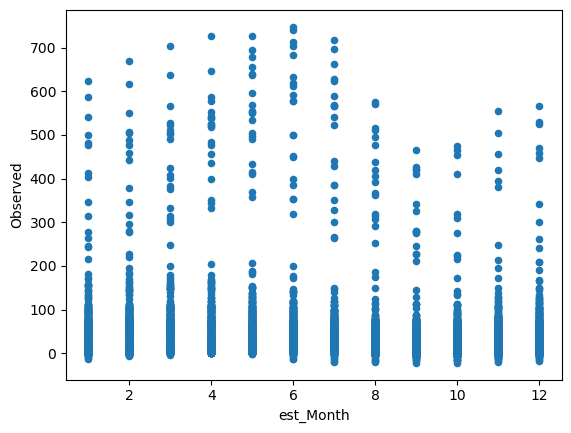

In [27]:
waterData.plot(kind = 'scatter', x = 'est_Month', y = 'Observed')

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

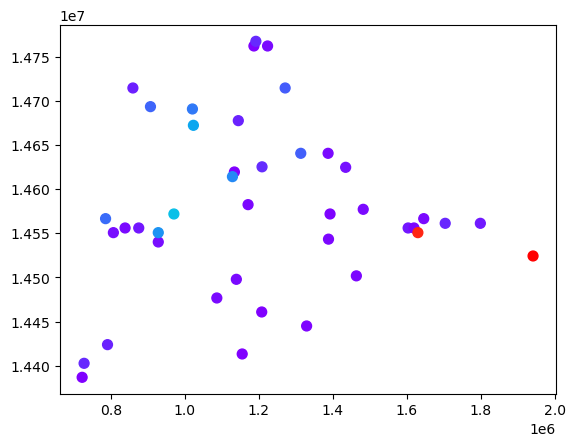

In [83]:
# waterData.plot(kind = 'scatter', x = 'x', y = 'y')
# plt.scatter( x= waterData.x, y = waterData.y, s=200, c=waterData.Observed, cmap='cividis')
temp = (waterData.groupby('Segment_id').agg('mean'))
plt.scatter( x= temp.x, y = temp.y, s=50, c=temp.Observed, cmap='rainbow')

In [25]:
for date in waterData['est_Month']:
    # print(math.floor(((date%365.25 /30)+2)%12)+1)
    print(date)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
5.0
6.0
7.0
8.0
9.0
10.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
3.0
4.0
5.0
6.0
7.0
8.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
1.0
2.0
3.0
4.0
5.0
6.0
11.0
12.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
3.0
4.0
5.0
6.0
5.0
6.0
7.0
8.0
12.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
1